# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1023.
Date:                Thu, 17 Jul 2025   Prob (F-statistic):           4.24e-42
Time:                        07:32:10   Log-Likelihood:                 2.0727
No. Observations:                  50   AIC:                             3.855
Df Residuals:                      46   BIC:                             11.50
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8880      0.082     59.254      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.37314942  4.8281515   5.24927918  5.61395843  5.90776208  6.12678015
  6.27826224  6.37942645  6.45463051  6.53136985  6.63576019  6.78824681
  7.00024541  7.2722666   7.59383197  7.94519566  8.30058859  8.63245218
  8.91596621  9.13312669  9.27570384  9.34659426  9.359345    9.33592782
  9.3031293   9.2881499   9.31413495  9.39637197  9.539779    9.73809652
  9.97491591 10.22637534 10.4650802  10.66460393 10.80382986 10.87042061
 10.86284509 10.79063004 10.67279482 10.53472659 10.40400928 10.30589159
 10.25913875 10.2729494  10.34544432 10.46397515 10.60720248 10.7486019
 10.86082181 10.92017728]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.89803891 10.76451138 10.5358384  10.24903733  9.95283605  9.69574264
  9.51416895  9.4235157   9.41440184  9.45496134]


## Plot comparison

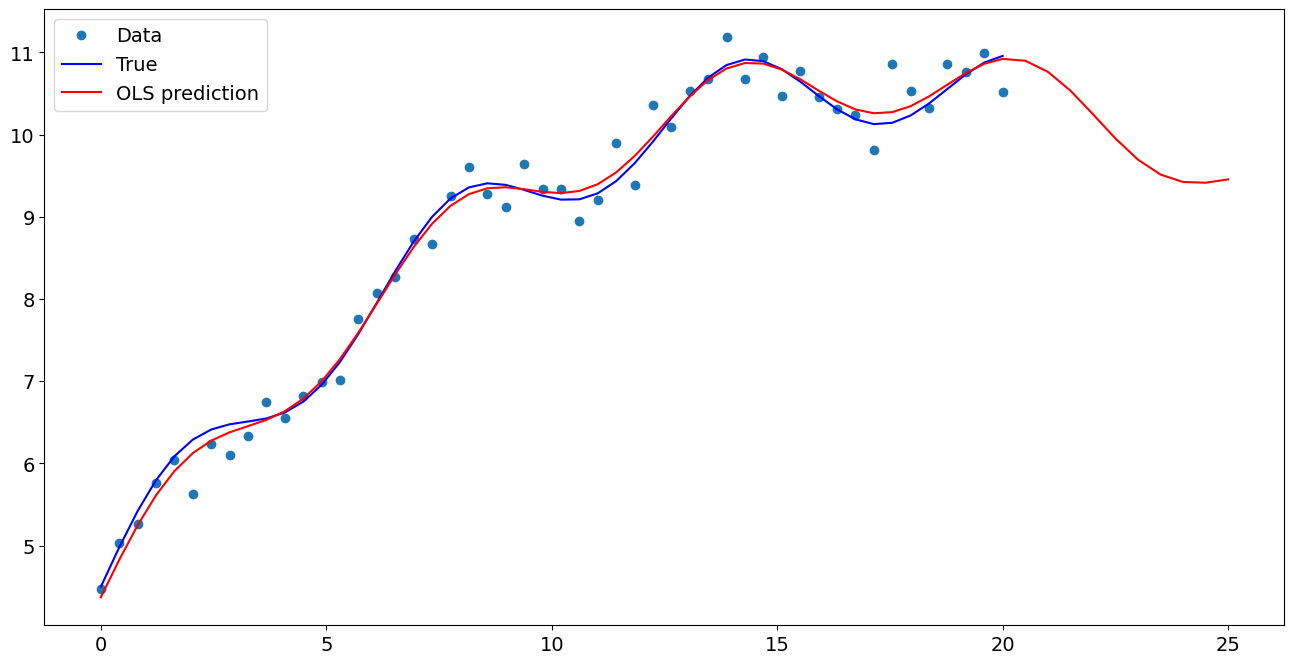

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.888042
x1                  0.514401
np.sin(x1)          0.414209
I((x1 - 5) ** 2)   -0.020596
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.898039
1    10.764511
2    10.535838
3    10.249037
4     9.952836
5     9.695743
6     9.514169
7     9.423516
8     9.414402
9     9.454961
dtype: float64